In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
diamond=pd.read_csv("C://Users//sudhi//OneDrive//Desktop//Analytics Labs//gemstone.csv")
diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
diamond.drop('id',axis=1,inplace=True)

In [7]:
y=diamond['price']

In [8]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [10]:
cat_col=diamond.select_dtypes(include='object')
num_col=diamond.select_dtypes(exclude='object')

In [12]:
#variables with column names
cat_names=cat_col.columns
num_names=num_col.columns

In [19]:
#outlier treatment
def outlier_treatment(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

In [21]:

num_col=num_col.apply(outlier_treatment)

<Axes: >

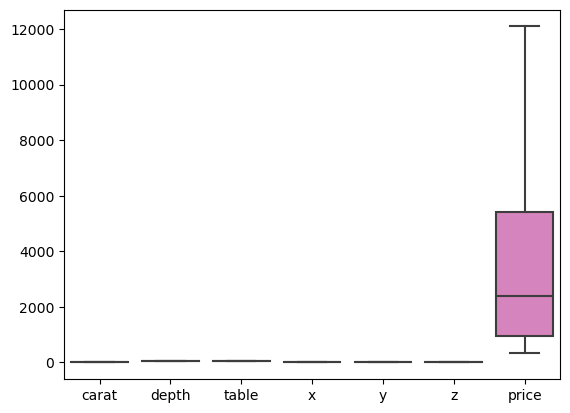

In [26]:
sns.boxplot(data=num_col)

In [28]:
#Checking missing value
cat_col.isnull().sum()

cut        0
color      0
clarity    0
dtype: int64

In [29]:
cat_col.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [30]:
cat_coded= pd.get_dummies(cat_col[['cut', 'color', 'clarity']], drop_first = True )

In [34]:
diamond_final=pd.concat([num_col,cat_coded],axis=1)

In [70]:
diamond_final.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [72]:
diamond_final=diamond_final.rename(columns={'cut_Very Good':'cut_Very_Good'})

In [74]:
#spitting the data in test and train
train, test = train_test_split(diamond_final,test_size=0.2,random_state=1)

In [75]:
train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [76]:
x_var=train.columns.difference(['price'])
y_var='price'

In [77]:
#define the model equation
formula_lm = 'price ~'+' + '.join(x_var)

In [78]:
formula_lm

'price ~carat + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + color_E + color_F + color_G + color_H + color_I + color_J + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + depth + table + x + y + z'

In [79]:
lm_0 = smf.ols(formula_lm,train).fit()

In [80]:
print(lm_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.320e+05
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:37:58   Log-Likelihood:            -1.2489e+06
No. Observations:              154858   AIC:                         2.498e+06
Df Residuals:                  154834   BIC:                         2.498e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1149.5376    325.580      3.531

In [81]:
lm_0.predict(train)

77292     5884.074932
6924      2873.446113
168362    6925.833082
182819    -580.628774
182933    1616.426235
             ...     
73349     1653.823403
109259    1723.844399
50057     1571.267288
5192      3533.510962
128037     764.545526
Length: 154858, dtype: float64

In [82]:
lm_1=smf.ols(formula_lm,test).fit()

In [83]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 3.283e+04
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:39:36   Log-Likelihood:            -3.1228e+05
No. Observations:               38715   AIC:                         6.246e+05
Df Residuals:                   38691   BIC:                         6.248e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2748.4862    594.782      4.621

In [84]:
lm_1.predict(test)

99346     1828.076446
131771    2232.993215
180688    5324.119953
176620    1574.068973
73302     4393.611619
             ...     
178719    1559.559558
88382      601.892793
45720     3382.877070
25823     5574.359384
46620     3611.642817
Length: 38715, dtype: float64

In [86]:
# MSE - Mean squared Error
mse_train = mean_squared_error( train.price, lm_0.predict(train))
mse_test = mean_squared_error( test.price, lm_0.predict(test))
print( 'MSE: ', mse_train, mse_test)
print( 'RMSE: ', np.sqrt(mse_train), np.sqrt(mse_test))

MSE:  592379.4640019772 594522.5716991813
RMSE:  769.6619153901129 771.0528981199548


In [87]:
pred=pd.concat([lm_0.predict(train),lm_1.predict(test)]).sort_index()

In [93]:
diamond['pred_price']=round(pred)

In [94]:
diamond

,carat,cut,color,clarity,depth,table,x,y,z,price,pred_price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,10368.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,11545.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,3521.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,851.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,11841.0
...,...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130,1434.0
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874,3766.0
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036,2948.0
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681,441.0


In [101]:
diamond.loc[(diamond['pred_price']>diamond['price'])]

,carat,cut,color,clarity,depth,table,x,y,z,price,pred_price
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,3521.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,851.0
5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506,8104.0
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229,3719.0
7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224,7330.0
...,...,...,...,...,...,...,...,...,...,...,...
193560,0.40,Ideal,E,VS2,62.9,57.0,4.69,4.64,2.94,1003,1200.0
193561,0.30,Ideal,E,VS1,62.4,55.0,4.30,4.33,2.69,800,883.0
193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872,2456.0
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130,1434.0


In [104]:
pd.to_pickle(lm_0,"C://Users//sudhi//OneDrive//Desktop//Analytics Labs//model.pkl")

In [103]:
pd.to_pickle(lm_0)